# Classification of the Iris Dataset Using a DNF-SOM

## Data Loading and Preparation

First, we load and prepare Fisher's Iris dataset.

In [1]:
# Libraries.
import os
import sys

# Machine Learning Utilities.
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Move to the models' directory.
sys.path.append(os.path.abspath("../Models"))

# Load the DNF-SOM models.
from DNFSOMClassifier1D import *
from DNFSOMClassifier2D import *

def load_process_iris(seed = 42):
    """
    Loads and processes Fisher's Iris dataset.
    """
    # Load the data.
    iris = load_iris()
    X, y = iris.data, iris.target
    labels = iris.target_names
    # Create training and testing sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size = 0.2,
        stratify = y,
        random_state = seed
    )
    # Normalise attributes.
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    return X_train, X_test, y_train, y_test, labels

X_train, X_test, y_train, y_test, labels = load_process_iris()

# Demonstration: 1-Dimensional DNF-SOM Classifier

With the data prepared, we proceed to train a 1-D DNF-SOM Classifier on the training set.
Once training is complete, we visualise the learned codebook, evaluate and report the classification
accuracy, and demonstrate how predictions are made using this framework.


Accuracy = 90.00%

Pred = setosa
Real = setosa


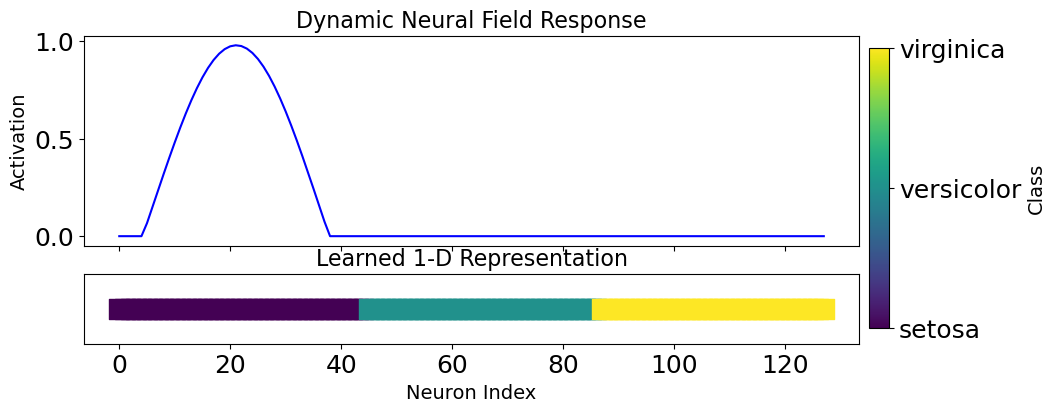

In [2]:
# Instantiate a 1-D DNF-SOM with 'n_units' neurons.
som_1d = DNFSOMClassifier1D(n_units = 128, seed = 2020)

# Fit the model on the training data.
som_1d.fit(X_train, y_train, epochs = 5000, verbose = -1)

# Visualise neural activation.
# som_1d.display_activity();
# Visualise the codebook.
# som_1d.display_classification(labels = labels);

# Make predictions.
y_pred = som_1d.predict(X_test)
print(f"\nAccuracy = {(100.0 * accuracy_score(y_test, y_pred)):.2f}%\n")

# Visualise a prediction.
som_1d.display_prediction(X_test, y_test, 0, labels);

# Demonstration: 2-Dimensional DNF-SOM Classifier

Finally, we repeat the process using a 2-Dimensional DNF-SOM Classifier, applying the same training, evaluation, and visualization steps as before.


Accuracy = 96.67%

Pred = setosa
Real = setosa


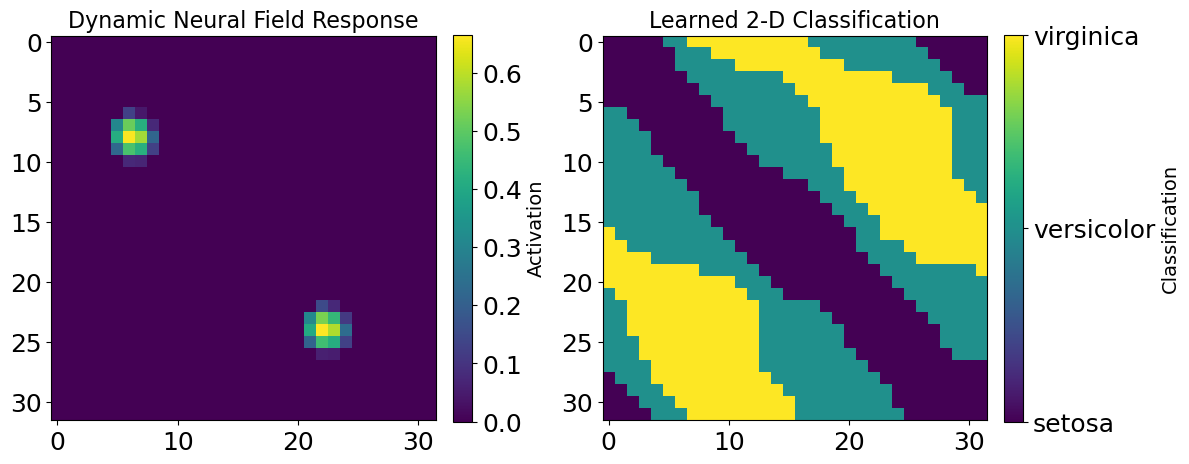

In [3]:
# Instantiate a 2-D DNF-SOM with 'n_units' neurons.
som_2d = DNFSOMClassifier2D(n_units = 32, seed = 2020)

# Fit the model on the training data.
som_2d.fit(X_train, y_train, epochs = 5000, verbose = -1)

# Visualise neural activation.
# som_2d.display_activity();
# Visualise the codebook.
# som_2d.display_classification(labels = labels);

# Make predictions.
y_pred = som_2d.predict(X_test)
print(f"\nAccuracy = {(100.0 * accuracy_score(y_test, y_pred)):.2f}%\n")

# Visualise a prediction.
som_2d.display_prediction(X_test, y_test, idx = 0, labels = labels);